In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data_path = "/content/audi.csv"

df = pd.read_csv(data_path)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nDataset Info:")
df.info()

Shape: (10668, 9)

Columns: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
print(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Remove rows with missing price
df = df[df['price'].notna()]

# Drop unrealistic negative or zero prices
df = df[df['price'] > 0]

# Optional: remove extremely high price outliers (>150,000)
df = df[df['price'] < 150000]

# Remove unrealistic mileage values
df = df[df['mileage'] < 300000]

# Print cleaned dataset shape
print("Cleaned Dataset Shape:", df.shape)

Cleaned Dataset Shape: (10564, 9)


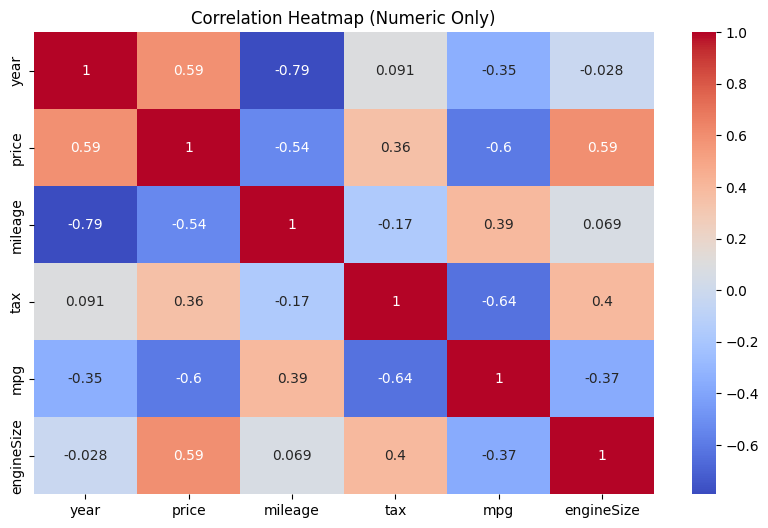

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()

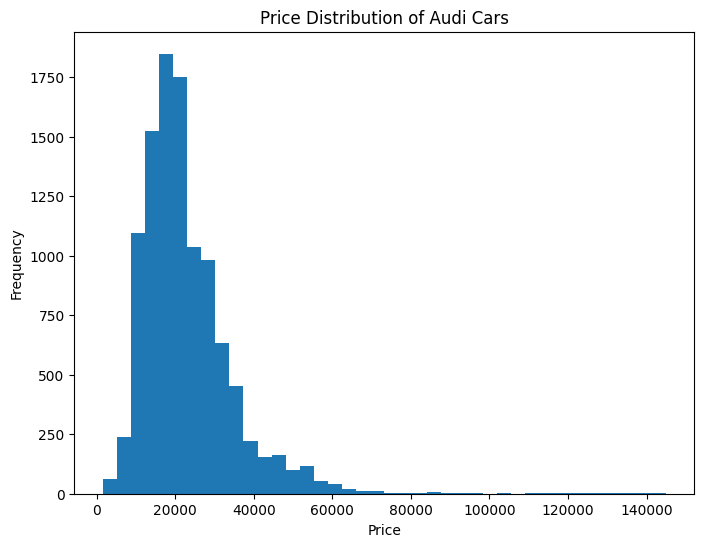

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=40)
plt.title("Price Distribution of Audi Cars")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

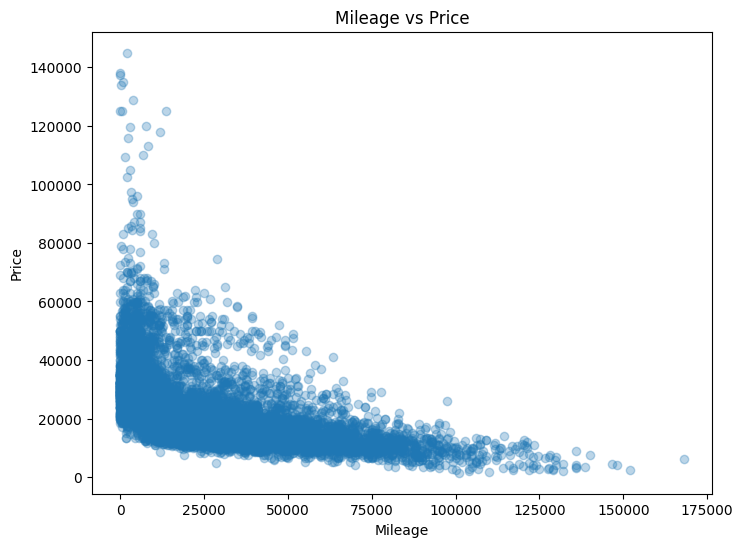

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['mileage'], df['price'], alpha=0.3)
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

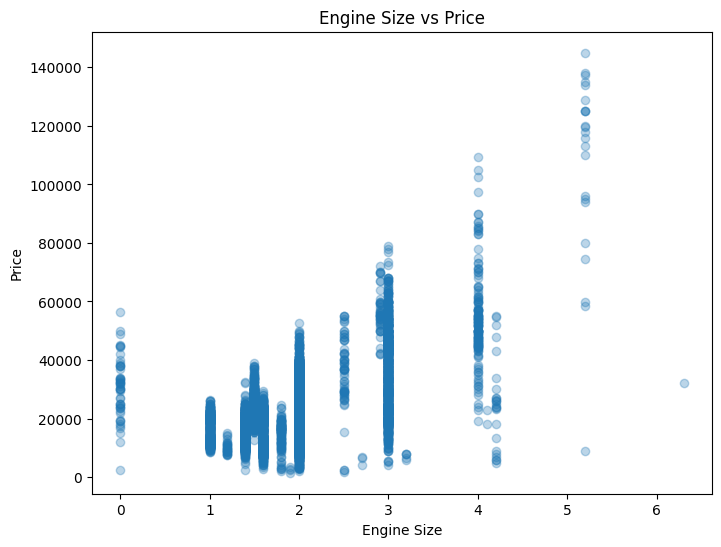

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['engineSize'], df['price'], alpha=0.3)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [12]:
# Select usable numerical features
features = ["year", "mileage", "engineSize", "mpg", "tax"]
df_ml = df[features + ["price"]].dropna()

X = df_ml[features]
y = df_ml["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Completed.")

Model Training Completed.


In [14]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", model.score(X_test, y_test))

MAE: 3511.238250503731
MSE: 33555931.98509939
RMSE: 5792.748223865715
R² Score: 0.762421050121219


In [15]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coef_df

,Feature,Coefficient
0,year,2034.308848
1,mileage,-0.100628
2,engineSize,11022.545263
3,mpg,-207.759523
4,tax,-15.279078
